# Boolean Functions on QC Hardware

We can express boolean functions as matrices, but often they are irreversible. The following operations always produce the same result, independent of the input. This is clearly not reversible.

In [1]:
f_0 = matrix([[0, 0], [1, 1]])
f_1 = matrix([[1, 1], [0, 0]])
pretty_print(f_0, f_1)

[0 0]
[1 1] [1 1]
[0 0]

Let's apply the operations to the z base kets.

In [2]:
z_0 = matrix([1, 0]).transpose()
z_1 = matrix([0, 1]).transpose()
pretty_print(f_0 * z_0, f_0 * z_1)
pretty_print(f_1 * z_0, f_1 * z_1)

[0]
[1] [0]
[1]

[1]
[0] [1]
[0]

We can show easily that these operations are not unitary. Multiplying a unitary matrix with its conjugate transposed results in the unit matrix.

In [3]:
pretty_print(f_0 * f_0.conjugate_transpose())
pretty_print(f_1 * f_1.conjugate_transpose())

[0 0]
[0 2]

[2 0]
[0 0]

We have a unary (unary: one bit in, one bit out $\neq$ unitary) function $f(x)$. We can create a quantum circuit which calculates $f$ and preserves the output. Therefore it is reversible and a valid operation. The $\oplus$ sign represents the binary xor operation.
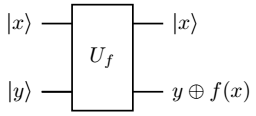

How to construct the matrix $U_f$? In general, we can construct the matrix of a unitary operation $U$ by concatenating the column vectors that arise when we apply $U$ to the base states:

$U_f = (U_f\lvert00\rangle, U_f\lvert01\rangle, U_f\lvert10\rangle, U_f\lvert11\rangle)$

For our $U_f$, $x$ remains the same and $y$ becomes $y\oplus f(x)$, therefore

$U_f=(\lvert0\rangle\lvert0\oplus f(0)\rangle, \lvert0\rangle\lvert1\oplus f(0)\rangle, \lvert1\rangle\lvert0\oplus f(1)\rangle, \lvert1\rangle\lvert1\oplus f(1)\rangle)$

If we apply the xor operation (also called addition modulo 2) with the value $0$ to any bit, it remains the same. With $1$ it gets inverted, therefore

$U_f=(\lvert0\rangle\lvert f(0)\rangle, \lvert0\rangle \lvert\overline{f(0)}\rangle,  \lvert1\rangle\lvert f(1)\rangle, \lvert1\rangle \lvert\overline{f(1)}\rangle$,
which can be seen as a manual to construct the matrix $U_f$ for arbitrary functions $f(x)$.

Matrices for the four unary operations $f(x)=0$, $f(x)=1$, $f(x)=x$ and $f(x)=\bar{x}$:

In [4]:
zero_rev = matrix([[1, 0, 0, 0], 
                   [0, 1, 0, 0], 
                   [0, 0, 1, 0], 
                   [0, 0, 0, 1]])
one_rev = matrix([[0, 1, 0, 0],
                  [1, 0, 0, 0],
                  [0, 0, 0, 1],
                  [0, 0, 1, 0]])
id_rev = matrix([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
not_rev = matrix([[0, 1, 0, 0],
                  [1, 0, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
pretty_print(zero_rev, one_rev, id_rev, not_rev)

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1] [0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0] [1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0] [0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]

Let us test the operations. We always set $y = 0$, since $0 \oplus f(x) = f(x)$:

In [5]:
z_0 = matrix([1, 0]).transpose()
z_1 = matrix([0, 1]).transpose()
for op in [zero_rev, one_rev, id_rev, not_rev]:
    for ket in [z_0, z_1]:
        pretty_print(op, '*', ket.tensor_product(z_0), '=', op * ket.tensor_product(z_0))

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1] '*' [1]
[0]
[-]
[0]
[0] '=' [1]
[0]
[0]
[0]

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1] '*' [0]
[0]
[-]
[1]
[0] '=' [0]
[0]
[1]
[0]

[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0] '*' [1]
[0]
[-]
[0]
[0] '=' [0]
[1]
[0]
[0]

[0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0] '*' [0]
[0]
[-]
[1]
[0] '=' [0]
[0]
[0]
[1]

[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0] '*' [1]
[0]
[-]
[0]
[0] '=' [1]
[0]
[0]
[0]

[1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0] '*' [0]
[0]
[-]
[1]
[0] '=' [0]
[0]
[0]
[1]

[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1] '*' [1]
[0]
[-]
[0]
[0] '=' [0]
[1]
[0]
[0]

[0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1] '*' [0]
[0]
[-]
[1]
[0] '=' [0]
[0]
[1]
[0]

Are the operations reversible?

In [6]:
for op in [zero_rev, one_rev, id_rev, not_rev]:
    pretty_print(zero_rev * zero_rev.conjugate_transpose())

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

We can proof for all $U_f$ constructed in this way, that they are their own inverse. If $U_f$ is it's own inverse, we can apply it two times to a ket $\lvert xy\rangle$ and receive the initial state. With some transformations, we can show that this works for all $U_f$ constructed like shown above. Note that $f(x)\oplus f(x) = 0$ for all $f(x)$ and $x$ and that $y\oplus 0=y$.

$(U_f U_f)\lvert xy\rangle = U_f(U_f\lvert xy\rangle) = U_f(\lvert x\rangle \lvert y\oplus f(x)\rangle) = \lvert x\rangle\lvert(y\oplus f(x))\oplus f(x)\rangle = \lvert x\rangle\lvert y\oplus (f(x)\oplus f(x))\rangle = \lvert xy\rangle$


Construction of the matrix is straightforward, we can write a function that converts a lookup table of a boolean function to the corresponding matrix. The input of the function "lookup_table" is a list which contains all values of $f(x)$, e.g. $[0,0,0,1]$ for the and-gate. 

In [7]:
def get_ket(bit_str):
    # create a state vector in z-base from binary string
    z_0 = matrix([1, 0]).transpose()
    z_1 = matrix([0, 1]).transpose()
    v = matrix([1])
    for b in bit_str:
        if b == '0':
            v = v.tensor_product(z_0)
        else:
            v = v.tensor_product(z_1)
    return v

def flip_bit(bit):
    # flip a bit in string form
    if bit == '0':
        return '1'
    if bit == '1':
        return '0'

def construct_rev_operation(lookup_table):
    # construct the matrix for the reversible operation of an arbitrary boolean function,
    # the lookup_table contains results of the function for all possible ordered inputs
    num_input = log(len(lookup_table), 2)
    m = []
    for i in range(2**num_input):
        m.append(get_ket(format(i, '0' + str(num_input) + 'b') + str(lookup_table[i])).list())
        m.append(get_ket(format(i, '0' + str(num_input) + 'b') + flip_bit(str(lookup_table[i]))).list())
    return matrix(m).transpose()

Let us test the function for the manually created matrices and some additional ones.

In [8]:
pretty_print('Always zero:', construct_rev_operation([0, 0]))
pretty_print('Always one:', construct_rev_operation([1, 1]))
pretty_print('Identity:', construct_rev_operation([0, 1]))
pretty_print('Not:', construct_rev_operation([1, 0]))
pretty_print('And:', construct_rev_operation([0, 0, 0, 1]))
pretty_print('Or:', construct_rev_operation([0, 1, 1, 1]))
pretty_print('Xor:', construct_rev_operation([0, 1, 1, 0]))
pretty_print('2-Bit always zero:', construct_rev_operation([0, 0, 0, 0]))
pretty_print('3-Bit and:', construct_rev_operation([0, 0, 0, 0, 0, 0, 0, 1]))

'Always zero:' [1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

'Always one:' [0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]

'Identity:' [1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]

'Not:' [0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]

'And:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]

'Or:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]

'Xor:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

'2-Bit always zero:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

'3-Bit and:' [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

Observation: The matrix has $\begin{pmatrix}1&0\\0&1\end{pmatrix}$ along the diagonal if there is a zero in the result vector and $\begin{pmatrix}0&1\\1&0\end{pmatrix}$ if there is a one. With this knowledge we can simplify the construction of the matrix.

In [9]:
def simple_construct_rev_operation(lookup_table):
    m = identity_matrix(len(lookup_table)*2)
    for i, b in enumerate(lookup_table):
        if b == 1:
            m.swap_rows(i*2, i*2+1)
    return m

In [10]:
pretty_print('Always zero:', simple_construct_rev_operation([0, 0]))
pretty_print('Always one:', simple_construct_rev_operation([1, 1]))
pretty_print('Identity:', simple_construct_rev_operation([0, 1]))
pretty_print('Not:', simple_construct_rev_operation([1, 0]))
pretty_print('And:', simple_construct_rev_operation([0, 0, 0, 1]))
pretty_print('Or:', simple_construct_rev_operation([0, 1, 1, 1]))
pretty_print('Xor:', simple_construct_rev_operation([0, 1, 1, 0]))
pretty_print('2-Bit always zero:', simple_construct_rev_operation([0, 0, 0, 0]))
pretty_print('3-Bit and:', simple_construct_rev_operation([0, 0, 0, 0, 0, 0, 0, 1]))

'Always zero:' [1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

'Always one:' [0 1 0 0]
[1 0 0 0]
[0 0 0 1]
[0 0 1 0]

'Identity:' [1 0 0 0]
[0 1 0 0]
[0 0 0 1]
[0 0 1 0]

'Not:' [0 1 0 0]
[1 0 0 0]
[0 0 1 0]
[0 0 0 1]

'And:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]

'Or:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]

'Xor:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

'2-Bit always zero:' [1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

'3-Bit and:' [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]